## HR ANALYSIS CASE STUDY

About this dataset : This dataset is retrieved from https://www.kaggle.com/shivan118/hranalysis

Objective of this project :
1. To find the most common factor of the employee getting promoted
2. To find whether the most excellence employee in all feature getting promoted or nor



IMPORT MODULES AND DATA

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
#read the data
train=pd.read_csv("data/train.csv")

#shape and data types of the data
print(train.shape)
print(train.dtypes)
train.head(5)

(54808, 14)
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Train dataset come with 54808 row and 14 columns and come with correct data types so no need to fix it.

For the data cleaning, In this project i didn't want to drop any column since i want to utilize every data and column that i have for various findings.
Next, i want to check the uniqueness of employee_id and replace the existing index with it.

In [3]:
#check the uniqueness of Idenifier
train['employee_id'].is_unique

True

In [4]:
#replace existing index with Identifier
train = train.set_index ('employee_id')
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


FIND MISSING DATA

Using Missing Data Heatmap and Missing Data Percentage List

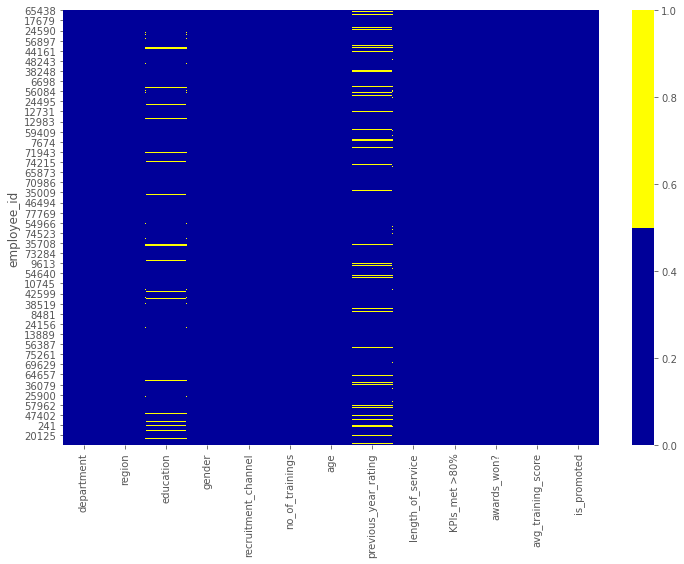

In [5]:
#Missing data heatmap-train
colours = ['#000099','#ffff00'] #specify the colours - yellow is missing and blue is not missing
sns.heatmap(train.isnull(),cmap=sns.color_palette(colours))

From finding above, I can see that there is a missing data in column education and previous year rating in both data

In [6]:
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      train.isnull().sum())
print("\nDistinct data in education")
print (train["education"].unique())
print("\nDistinct data in previous year rating")
print (train["previous_year_rating"].unique())

 
Count total NaN at each column in a DataFrame : 

 department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Distinct data in education
["Master's & above" "Bachelor's" nan 'Below Secondary']

Distinct data in previous year rating
[ 5.  3.  1.  4. nan  2.]


In [7]:
null_data = train[train.isnull().any(axis=1)]
null_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0
10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


After thourough observation above, I decided to drop observation that have Nan education record and impute Nan previous year rating to zero. This is because, I believe NaN in education column really meant no record since the disctinct element in that column already cover all level of education.Moreover, the percentage of missing data is only 4.4% compared to total observation. For previous year rating, i believe this is for new worker since their length of service is 1, so they didn't have rating yet. I also want to change column name from awards_won? to awards_won and change the element in education to avoid confusion.

In [8]:
#drop row that have NaN education
train.dropna(subset=['education'],inplace =True)

train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0


In [9]:
train[train['previous_year_rating'].isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
9150,Analytics,region_22,Bachelor's,f,other,1,28,NaN,1,1,0,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0


In [10]:
#impute Nan in previous_year_rating into 0.0
train['previous_year_rating'] = train['previous_year_rating'].fillna(0.0)

In [11]:
train.loc[train['previous_year_rating'] == 0.0]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
71177,Procurement,region_5,Bachelor's,m,other,1,27,0.0,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,0.0,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,0.0,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,0.0,1,1,0,47,0
9150,Analytics,region_22,Bachelor's,f,other,1,28,0.0,1,1,0,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74615,R&D,region_31,Bachelor's,m,sourcing,1,30,0.0,1,1,0,88,0
11685,Operations,region_15,Bachelor's,m,sourcing,1,31,0.0,1,1,0,56,1
10546,Finance,region_6,Bachelor's,m,other,1,28,0.0,1,1,0,61,0


In [12]:
#change Master's to Master and Bacelor's to Bachelor, change column name to awards_won
train['education'] = train['education'].replace(["Bachelor's"],'Bachelor')
train['education'] = train['education'].replace(["Master's & above"],'Master & above')
train = train.rename({'awards_won?': 'awards_won', 'KPIs_met >80%':'KPIs_met_more_than_80_percent' }, axis=1) 
train  

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,Sales & Marketing,region_14,Bachelor,m,other,2,31,1.0,2,0,0,49,0
3030,Technology,region_14,Bachelor,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master & above,f,other,1,37,2.0,6,0,0,56,0


Until here, the row that have NaN education is dropped,NaN previous_year_rating is impute to 0 and change element of education from Bachelor's to Bachelor and Master's & above to Master & above. For next step, I want to check the existence of irregular or outliers data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E614E46BE0>,
      dtype=object)

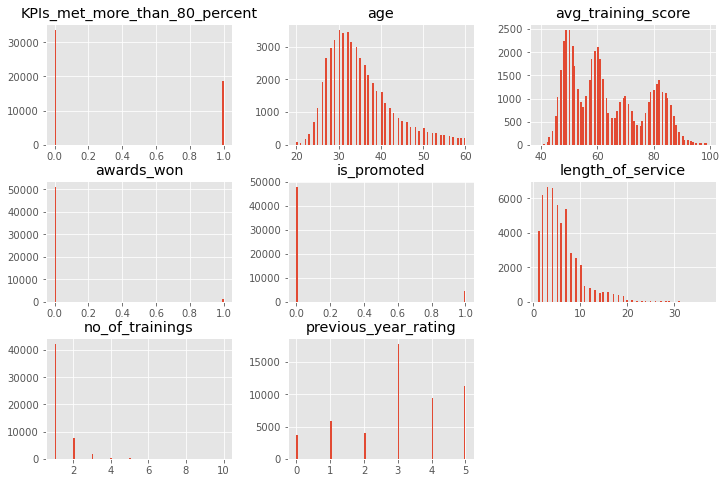

In [13]:
train.hist(bins = 100)

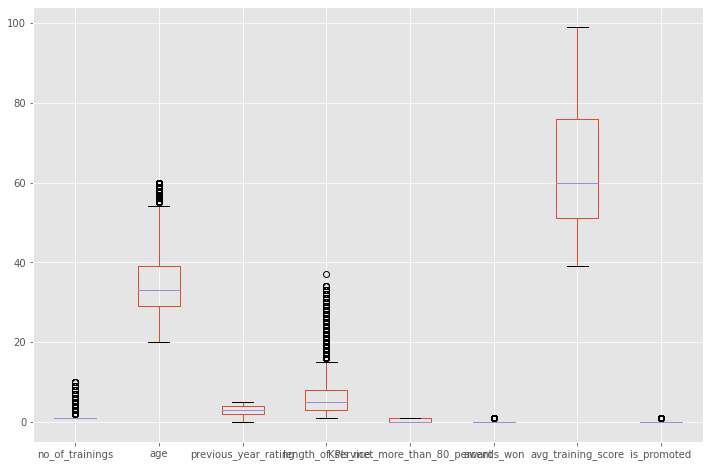

In [14]:
train.boxplot()

from above histogram and boxplot, I can conclude that there is no outlier data exist. For next, I will try to identify the existence of inconsistent data

In [15]:
for col in train:
    print(train[col].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
['Master & above' 'Bachelor' 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']
[ 1  2  3  4  7  5  6  8 10  9]
[35 30 34 39 45 31 33 28 32 49 37 38 27 29 26 57 40 42 23 59 44 50 56 20
 25 41 47 36 46 60 24 43 54 22 58 48 55 51 52 53 21]
[5. 3. 1. 4. 0. 2.]
[ 8  4  7 10  2  5  6  3 16  9  1 26 12 11 17 14 13 19 15 23 20 18 22 25
 28 24 31 21 29 30 34 27 33 32 37]
[1 0]
[0 1]
[49 60 50 73 85 59 63 83 54 80 84 77 51 46 75 70 68 79 44 72 61 58 87 47
 57 52 88 71 48 65 62 53 78 9

From above i can say that there is no inconsistent data here. Every data fit the specific standars in each column

RESULT OF A CLEAN DATA

In [16]:
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,Sales & Marketing,region_14,Bachelor,m,other,2,31,1.0,2,0,0,49,0
3030,Technology,region_14,Bachelor,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master & above,f,other,1,37,2.0,6,0,0,56,0


DATA MANIPULATION

 To find the main factor that contribute to the employee getting promoted
 1. Percent of employee getting promoted
 2. Total of being promoted by group of education, department, no. of training, previous year rating,  length of service, KPIs met >80%, awards won, average training score


In [17]:
train['is_promoted'].value_counts(normalize=True) * 100

0    91.324262
1     8.675738
Name: is_promoted, dtype: float64

In [18]:
train['is_promoted'].value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

In [19]:
#create new data frame with all promoted data
promoted = train[train.is_promoted == 1]
promoted

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
49017,Sales & Marketing,region_7,Bachelor,f,sourcing,1,35,5.0,3,1,0,50,1
58304,Sales & Marketing,region_28,Bachelor,m,sourcing,1,33,5.0,6,1,0,51,1
17673,Sales & Marketing,region_4,Master & above,m,other,1,50,4.0,17,1,0,47,1
77981,Finance,region_22,Bachelor,m,other,1,27,0.0,1,1,1,58,1
16502,Sales & Marketing,region_22,Bachelor,m,sourcing,1,27,0.0,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11685,Operations,region_15,Bachelor,m,sourcing,1,31,0.0,1,1,0,56,1
14502,Technology,region_7,Master & above,m,other,1,54,4.0,7,0,0,81,1
8278,Procurement,region_13,Bachelor,f,sourcing,1,30,4.0,2,1,0,86,1


EDUCATION

In [20]:
#overall value of education
train['education'].value_counts() 

Bachelor           36669
Master & above     14925
Below Secondary      805
Name: education, dtype: int64

Text(0.5, 0.98, 'Education')

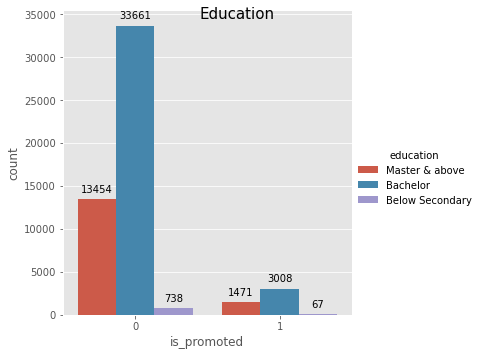

In [21]:
 b = sns.catplot(x="is_promoted", hue="education", kind="count", data=train, height=5, aspect=1.0)

# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
b.fig.suptitle("Education", fontsize=15)
#NOTE: TRY TO FIND HOW TO GET PERCENTAGE HERE/RATE OF CHANCE

Input from observation above :
EDUCATION

For education, the number of bachelors getting promoted is higher than Masters and above, given the number of employee that have bachelors is also high compared to other group of education

DEPARTMENT

Text(0.5, 0.98, 'Department')

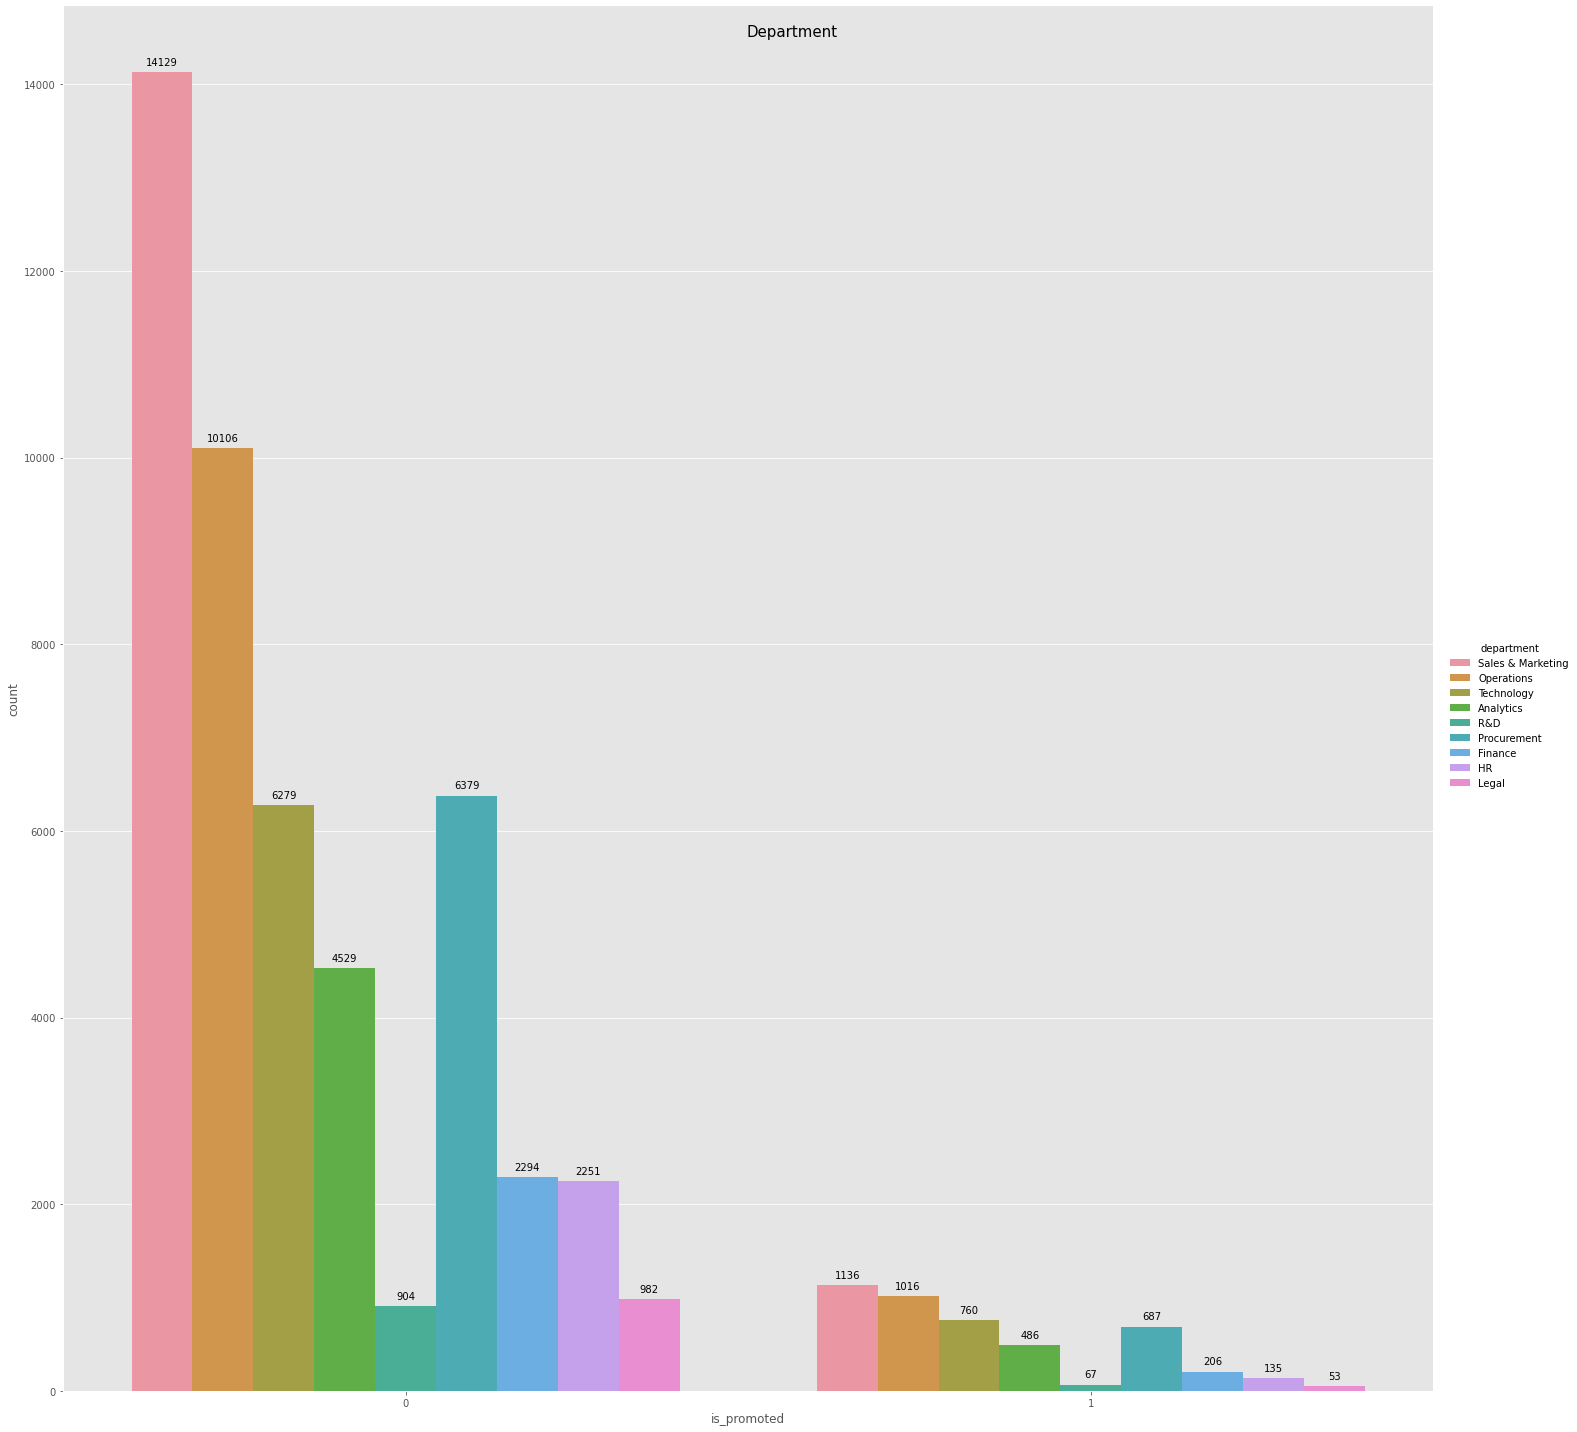

In [22]:
b = sns.catplot(x="is_promoted", hue="department", kind="count", data=train, height=20, aspect=1.0)

# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0,10), 
                textcoords = 'offset points')
b.fig.suptitle("Department", fontsize=15)

Observation :
Deparment of Sales and Marketing have highest number of employee getting promoted compared to other deparment. Sales and Department have highest number of employee, maybe this is one of the reason

NUMBER OF TRAINING

In [23]:
train['no_of_trainings'].value_counts()

1     42317
2      7708
3      1726
4       454
5       124
6        43
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Text(0.5, 0.98, 'Number of trainings')

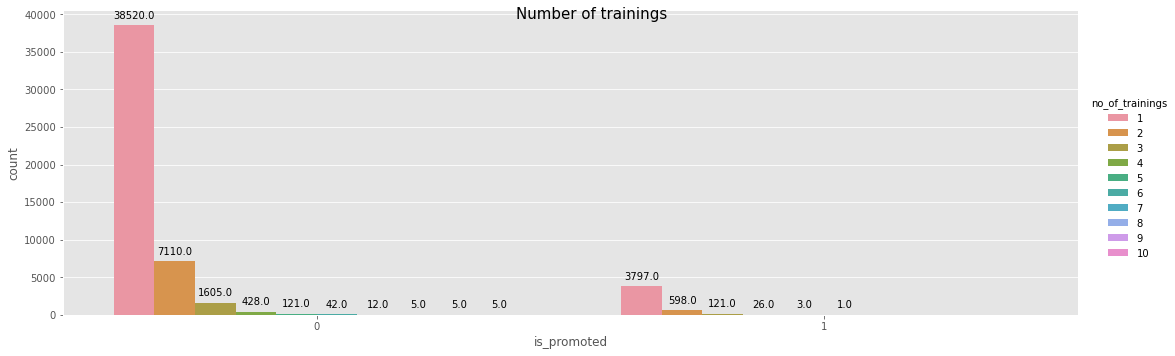

In [24]:
b = sns.catplot(x="is_promoted", hue="no_of_trainings", kind="count", data=train, height=5, aspect=3.0)

# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
b.fig.suptitle("Number of trainings", fontsize=15)

From observation above, we can say that almost employee only undergo once training and only a few have go twice and thrice, that lead to employee that went to the training once has a lot of percentage getting promoted compared to others.

PREVIOUS YEAR RATING

In [25]:
train['previous_year_rating'].value_counts() 

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
0.0     3739
Name: previous_year_rating, dtype: int64

Text(0.5, 0.98, 'previous_year_rating')

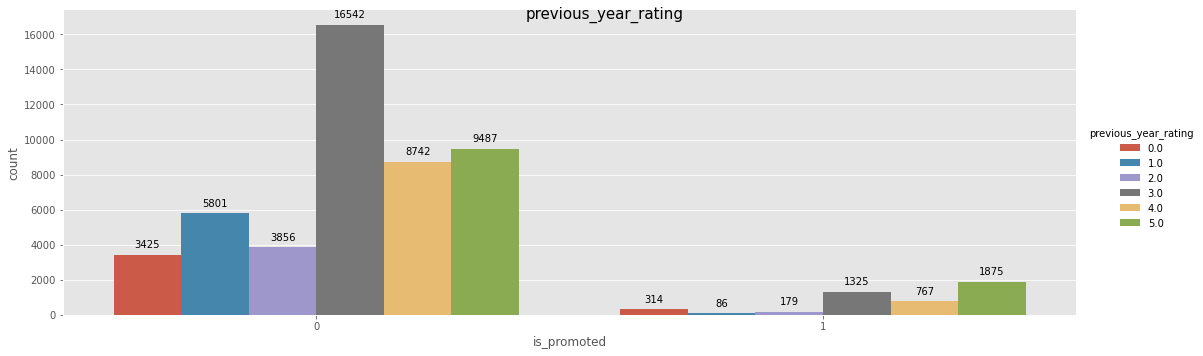

In [26]:
b = sns.catplot(x="is_promoted", hue="previous_year_rating", kind="count", data=train, height=5, aspect=3.0)

# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
b.fig.suptitle("previous_year_rating", fontsize=15)

From observaton above, we can see that the there is a lot of employee that get highest rating that is 5.0 in previous year is promoted. The second higest is rating 3.0. This is maybe because the population of employeee get rating 3.0 is highest.

LENGTH OF SERVICE

In [27]:
train['length_of_service'].value_counts()

3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
1     4119
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: length_of_service, dtype: int64

Text(0.5, 0.98, 'Length of Service')

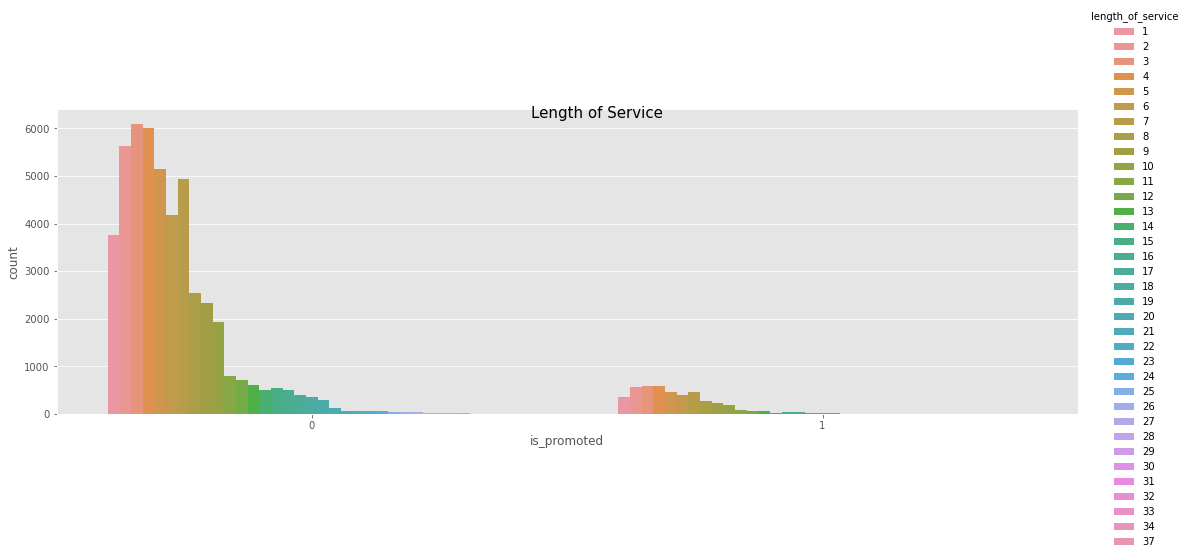

In [28]:
b = sns.catplot(x="is_promoted", hue="length_of_service", kind="count", data=train, height=5, aspect=3.0)
b.fig.suptitle("Length of Service", fontsize=15)

#try find how to regroup by year group, like 0-10,11-20 etc

From data above, we can say that a lot of employee are in their first 10 year of service and a lot of worker that getting employed is also from this group year of service.

KPIs MET >80%

In [29]:
train['KPIs_met_more_than_80_percent'].value_counts() 

0    33703
1    18696
Name: KPIs_met_more_than_80_percent, dtype: int64

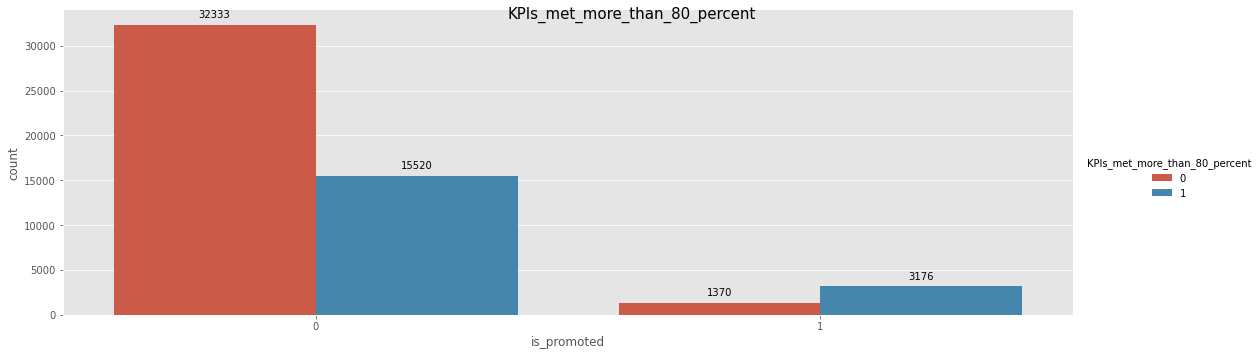

In [30]:
b = sns.catplot(x="is_promoted", hue="KPIs_met_more_than_80_percent", kind="count", data=train, height=5, aspect=3.0)
b.fig.suptitle("KPIs_met_more_than_80_percent", fontsize=15)
# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


Observation above stated that only one third of employee is achieved KPIs met >80%. From the promoted employee data, almost 70% of them achieved the KPIs > 80%. If the employee's KPIs did not met >80%, they still can get promoted, however the chance is really low like 30%.

AWARD WON

In [31]:
train['awards_won'].value_counts()

0    51185
1     1214
Name: awards_won, dtype: int64

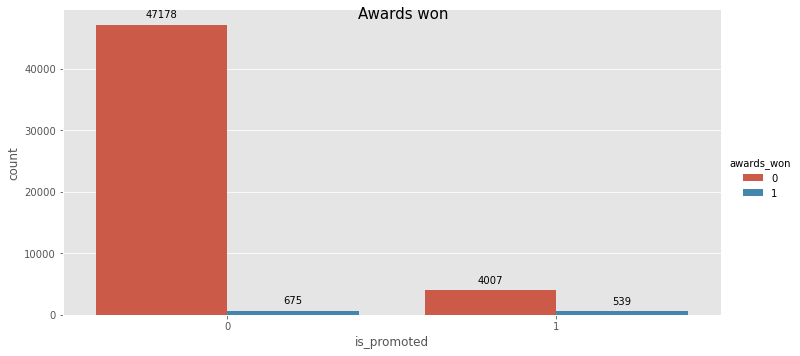

In [32]:
b = sns.catplot(x="is_promoted", hue="awards_won", kind="count", data=train, height=5, aspect=2.0)
b.fig.suptitle("Awards won", fontsize=15)
# to plot the values for each bar
ax = b.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

Only 2% out of all employee win an awards and 44.4% of them getting promoted ( 539 out of 1214). Almost 88% of employee that getting promotion never won any award, but the compeetition or chance for them to get promoted is really hard since there is also many other worker that didn't get any awards win, the chance for them to get promoted is only 7.8%

AVERAGE TRAINING SCORE

In [33]:
train['avg_training_score'].value_counts() 

50    2490
49    2480
48    2235
51    2138
60    2122
      ... 
98      36
99      35
41      26
40       4
39       2
Name: avg_training_score, Length: 61, dtype: int64

Text(0.5, 0.98, 'Average Training Score')

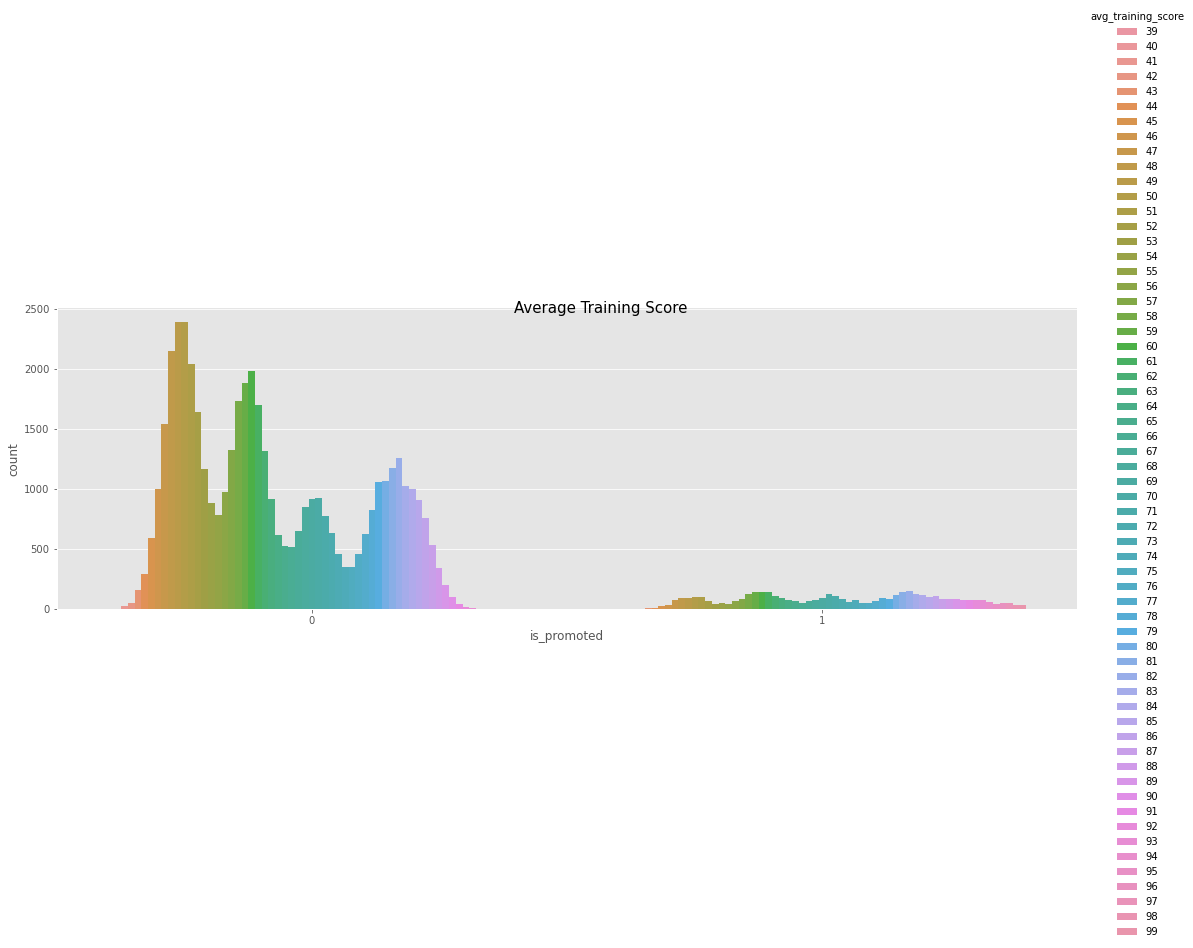

In [34]:
b = sns.catplot(x="is_promoted", hue="avg_training_score", kind="count", data=train, height=5, aspect=3.0)
b.fig.suptitle("Average Training Score", fontsize=15)


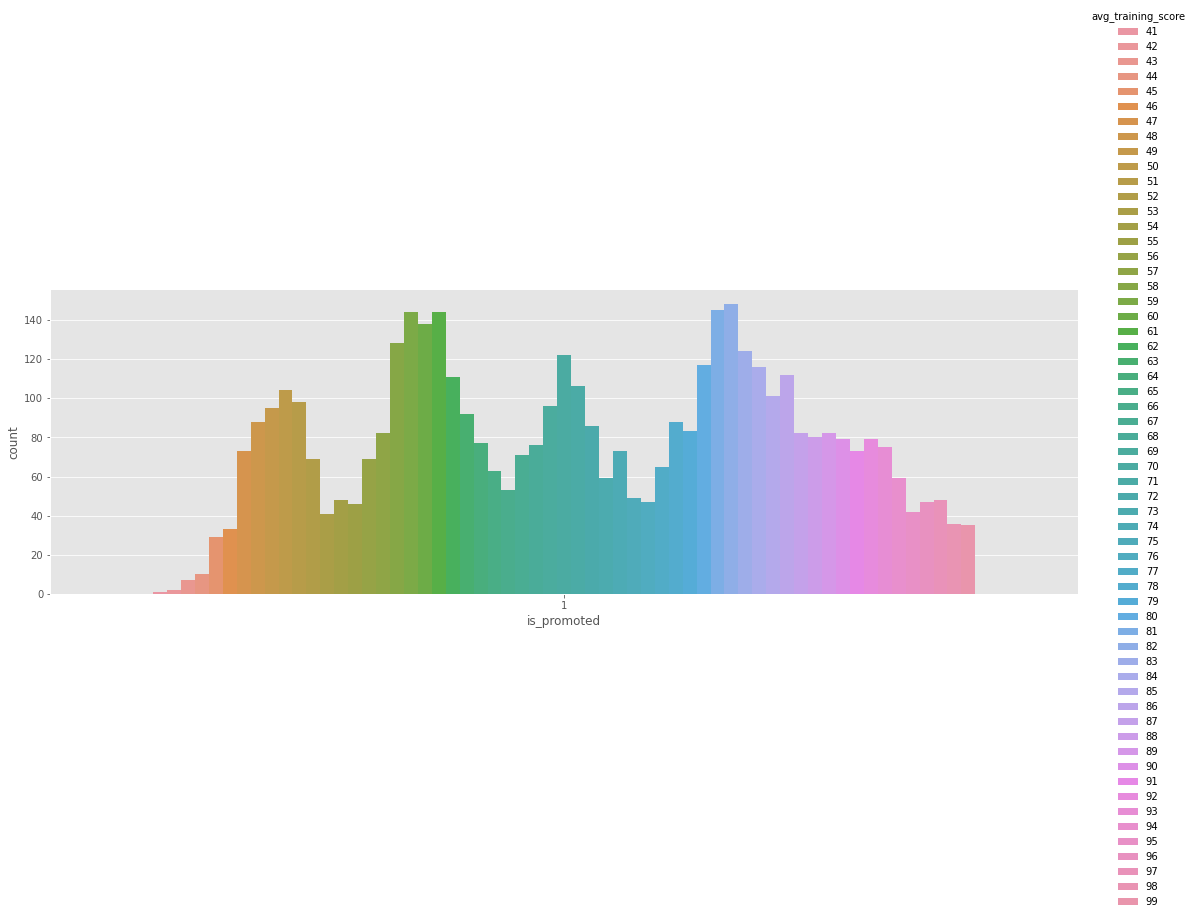

In [35]:
b = sns.catplot(x="is_promoted", hue="avg_training_score", kind="count", data=promoted, height=5, aspect=3.0)

In [36]:
#create new data frame with all promoted data
promoted['avg_training_score'].value_counts()

82    148
81    145
61    144
59    144
60    138
58    128
83    124
70    122
80    117
84    116
86    112
62    111
71    106
50    104
85    101
51     98
69     96
49     95
63     92
78     88
48     88
72     86
79     83
87     82
57     82
89     82
88     80
92     79
90     79
64     77
68     76
93     75
91     73
47     73
74     73
67     71
56     69
52     69
77     65
65     63
73     59
94     59
66     53
75     49
97     48
54     48
96     47
76     47
55     46
95     42
53     41
98     36
99     35
46     33
45     29
44     10
43      7
42      2
41      1
Name: avg_training_score, dtype: int64

From graph above, I gues a lot of employee get their score between 50-60, followed by 61-70, then 80-90 and less people get around 71-80. However, if we see at graph of employee that getting promoed, you can't see much diffrent number from any group of score. However, we can see roughly that the the most score that getting promoted is 80. And the hishest score you get, the highest chance for you to get promoted since not many people get 90 and above.

MOST COMMON FEATURES OF WORKERS THAT GETTING PROMOTED IS : 

1. Education: Bachelors
2. Department : Sales and Marketing
3. Number of training : 1
4. Previous Year rating : 3
5. Length of service : 3 
6. KPIs met >80% : 1
7. Award Won : 0
8. Avg Training Score : 82

In [46]:
common1 = promoted.query("length_of_service == 3 & awards_won== 0 & KPIs_met_more_than_80_percent == 1 & no_of_trainings == 1 & previous_year_rating == 3 & avg_training_score == 82")
common1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
34420,Analytics,region_22,Bachelor,m,referred,1,27,3.0,3,1,0,82,1
56955,Technology,region_22,Master & above,m,sourcing,1,32,3.0,3,1,0,82,1
75736,Analytics,region_22,Bachelor,f,sourcing,1,28,3.0,3,1,0,82,1


After experimenting with the data, I found that there is only 3 worker that comply 6/8 most common features of workers getting employed.

MOST EXCELLENCE FEATURES OF WORKERS THAT GETTING PROMOTED VS NOT GETTING PROMOTED. IS THERE ANY EXCELLENCE WORKER THAT DID NOT GET ANY PROMOTION? : (compare with all data)
Focus with achievement as a worker first.

1. Award Won : 1
2. KPIs met >80% : 1
3. Previous Year rating : 5
4. Avg Training Score : 99

In [48]:
excellence_employee = train.query("awards_won == 1 & KPIs_met_more_than_80_percent == 1 & previous_year_rating == 5 & avg_training_score == 99 ")
excellence_employee

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
70800,Operations,region_4,Master & above,f,sourcing,1,37,5.0,8,1,1,99,1
52286,Sales & Marketing,region_28,Master & above,f,other,1,34,5.0,6,1,1,99,1
77820,Operations,region_5,Bachelor,m,sourcing,1,31,5.0,7,1,1,99,1
63795,Operations,region_4,Bachelor,m,other,1,34,5.0,5,1,1,99,1


From data above, I try to find excellence worker that achieve the best among them and as a result, I got 4 employee, 2 with Master & above and 2 with Bachelor and surprisingly they only attend trainings once and all of them are getting promoted. All of them are in their first 10 year of service. 

As a conclusion, all of the excellence worker are getting their promotion as they deserved

ROOM FOR IMPROVEMENT
1. Turn data in avg_training_course into group of score such as 10-20,21-30, etc..
2. Find percentage of is_employed by different type of features
3. Find most excellence worker based on normal best criteria